In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
import requests

In [3]:
# Read in csv
data_x = pd.read_csv("files/congress-trading-all.csv")
x_df = pd.DataFrame(data_x)

display(x_df)

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,GLW,ST,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,-1.054504,Georgia,2024-07-25
1,ABCB,ST,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",NEW,STIFEL,NaN,Earl Leroy Carter,C001103,2024-07-24,R,GA01,House,NaN,2024-07-25,2.772833,Georgia,2024-07-25
2,UPS,ST,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.592441,Georgia,2024-07-25
3,DUK,ST,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.541266,Georgia,2024-07-25
4,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.599848,Georgia,2024-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47266,CAT,NaN,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,D000622,2014-07-08,D,IL08,House,NaN,2020-07-26,19.001886,Illinois,2023-11-16
47267,PG,NaN,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,D000622,2014-07-08,D,IL08,House,NaN,2020-07-26,-143.881120,Illinois,2023-11-16
47268,KSU,NaN,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Mr. Alan S. Lowenthal,L000579,2014-05-15,D,CA47,House,NaN,2020-07-26,89.238230,California,2023-11-16
47269,EP$C,NaN,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NEW,NaN,NaN,Mr. Alan S. Lowenthal,L000579,2014-05-15,D,CA47,House,NaN,2020-07-26,NaN,California,2023-11-16


In [4]:
  ## Democrats            ## Republicans
# Josh Gottheimer       # Thomas Macarthur
# Lois Frankel          # David Perdue
# Susie Lee             # Greg Gianforte

In [5]:
x_df_clean = x_df[['Name','Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
display(x_df_clean.head())

display(x_df_clean.tail())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene,R,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter,R,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene,R,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene,R,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene,R,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
47266,Ms. Tammy Duckworth,D,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",19.001886
47267,Ms. Tammy Duckworth,D,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",-143.881120
47268,Mr. Alan S. Lowenthal,D,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",89.238230
47269,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NaN
47270,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-02-27,Sale,"$1,001 - $15,000",NaN


In [6]:
# Filter the DataFrame to find rows where the 'name' column matches the target name
x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'
x_df_clean2 = x_df_clean[['Name_Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
x_df_clean2.head()

C:\Users\spenc\AppData\Local\Temp\ipykernel_16800\3616053231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'


,Name_Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene (R),CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter (R),AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene (R),"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene (R),DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene (R),JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


In [7]:
df_josh = x_df_clean[x_df_clean['Name_Party'] == 'Josh Gottheimer (D)']
df_thomas = x_df_clean[x_df_clean['Name_Party'] == 'Thomas Macarthur (R)']
df_perdue = x_df_clean[x_df_clean['Name_Party'] == 'Perdue, David (R)']
df_lois = x_df_clean[x_df_clean['Name_Party'] == 'Lois Frankel (D)']
df_greg = x_df_clean[x_df_clean['Name_Party'] == 'Greg Gianforte (R)']
df_susie = x_df_clean[x_df_clean['Name_Party'] == 'Susie Lee (D)']

In [8]:
df_r = [df_thomas, df_perdue, df_greg]
combined_rep_df = pd.concat(df_r, axis=0)
display(combined_rep_df)

df_d = [df_josh, df_lois, df_susie]
combined_dem_df = pd.concat(df_d, axis=0)
display(combined_dem_df)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.469809,Thomas Macarthur (R)
26980,Thomas Macarthur,R,PHILIP MORRIS INTERNATIONAL INC,2018-12-31,Sale,"$1,001 - $15,000",-47.912357,Thomas Macarthur (R)
26990,Thomas Macarthur,R,NXP SEMICONDUCTORS N.V.,2018-12-31,Purchase,"$15,001 - $50,000",128.382528,Thomas Macarthur (R)
26997,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
26999,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
33546,Greg Gianforte,R,ACUITY BRANDS INC,2017-07-10,Sale,"$1,001 - $15,000",-99.649286,Greg Gianforte (R)
33552,Greg Gianforte,R,"GRAND CANYON EDUCATION, INC.",2017-07-10,Sale,"$1,001 - $15,000",-24.170552,Greg Gianforte (R)
33553,Greg Gianforte,R,VEEVA SYSTEMS INC. CLASS A,2017-07-10,Sale,"$1,001 - $15,000",84.825189,Greg Gianforte (R)
33608,Greg Gianforte,R,"DASSAULT SYSTEMES, S.A. AMERICAN DEPOSITARY SH...",2017-06-30,Sale,"$100,001 - $250,000",NaN,Greg Gianforte (R)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
24,Josh Gottheimer,D,MARRIOTT INTERNATIONAL - CLASS A COMMON STOCK,2024-06-28,Sale,"$1,001 - $15,000",-2.178386,Josh Gottheimer (D)
25,Josh Gottheimer,D,APPLE INC. - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",3.444960,Josh Gottheimer (D)
27,Josh Gottheimer,D,NVIDIA CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-8.523072,Josh Gottheimer (D)
28,Josh Gottheimer,D,MICROSOFT CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-4.890644,Josh Gottheimer (D)
30,Josh Gottheimer,D,"LOWE'S COMPANIES, INC. COMMON STOCK",2024-06-28,Sale,"$1,001 - $15,000",8.310732,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
26713,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
26739,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
26742,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
26744,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [9]:
sorted_rep_df = combined_rep_df.sort_values('excess_return', ascending=False)
display(sorted_rep_df)

sorted_dem_df = combined_dem_df.sort_values('excess_return', ascending=False)
display(sorted_dem_df)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
17879,"Perdue, David",R,Targa Resources Corp.,2020-04-15,Sale (Full),"$1,001 - $15,000",1450.660004,"Perdue, David (R)"
36047,Thomas Macarthur,R,"IMMUNOGEN, INC.",2016-12-08,Sale,"$1,001 - $15,000",1429.555181,Thomas Macarthur (R)
22613,Greg Gianforte,R,"CBL & ASSOCIATES PROPERTIES, INC.",2019-09-11,Sale,"$15,001 - $50,000",1371.278586,Greg Gianforte (R)
27279,Greg Gianforte,R,"CBL & ASSOCIATES PROPERTIES, INC.",2018-12-21,Purchase,"$50,001 - $100,000",1079.242758,Greg Gianforte (R)
43194,Thomas Macarthur,R,"MERCADOLIBRE, INC.",2015-02-06,Purchase,"$1,001 - $15,000",1044.322775,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
32753,Greg Gianforte,R,LINDE AG SPONSORED ADR,2017-09-19,Sale,"$50,001 - $100,000",NaN,Greg Gianforte (R)
32993,Greg Gianforte,R,L'OREAL CO. AMERICAN DEPOSITARY SHARES,2017-08-28,Sale,"$50,001 - $100,000",NaN,Greg Gianforte (R)
33262,Greg Gianforte,R,ROCHE HOLDINGS AG BASEL AMERICAN DEPOSITARY SH...,2017-07-31,Sale,"$50,001 - $100,000",NaN,Greg Gianforte (R)
33263,Greg Gianforte,R,SHIRE PLC ORDINARY SHARES,2017-07-31,Purchase,"$50,001 - $100,000",NaN,Greg Gianforte (R)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
34010,Josh Gottheimer,D,NVIDIA CORPORATION,2017-06-09,Sale,"$1,001 - $15,000",2799.133355,Josh Gottheimer (D)
31571,Josh Gottheimer,D,NVIDIA CORPORATION,2018-01-03,Sale,"$1,001 - $15,000",1927.177254,Josh Gottheimer (D)
31552,Josh Gottheimer,D,NVIDIA CORPORATION,2018-01-04,Sale,"$1,001 - $15,000",1916.895187,Josh Gottheimer (D)
31493,Josh Gottheimer,D,NVIDIA CORPORATION,2018-01-08,Sale,"$1,001 - $15,000",1838.392090,Josh Gottheimer (D)
19818,Josh Gottheimer,D,NVIDIA CORPORATION,2020-02-28,Purchase,"$1,001 - $15,000",1490.395574,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
17586,Susie Lee,D,LIBERTY BROADBAND CORPORATION - CLASS A COMMON...,2020-04-28,Purchase,"$1,001 - $15,000",NaN,Susie Lee (D)
21133,Susie Lee,D,IHS INC. IHS INC. CLASS A,2019-12-27,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
26742,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
26744,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [10]:
## What was the Trade_Size_USD volume/average for each year of healthcare stocks, and did it progress from 2019-2021 more than other years?
## pull the top 3 traded health care stocks from 2019-2021.
## sort by the Trade_Size_USD, highest to lowest
healthcare_rep_df = sorted_rep_df[sorted_rep_df['Company'].str.contains('Healthcare', case=False, na=False)]
healthcare_rep_df

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
18034,"Perdue, David",R,"HCA Healthcare, Inc.",2020-04-14,Sale (Full),"$15,001 - $50,000",123.491818,"Perdue, David (R)"
31094,Greg Gianforte,R,"HEALTHCARE TRUST OF AMERICA, INC. CLASS A",2018-02-06,Sale,"$1,001 - $15,000",-35.096859,Greg Gianforte (R)
15530,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-08-31,Purchase,"$15,001 - $50,000",-38.360048,Greg Gianforte (R)
15492,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)
15490,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)
15491,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)
15469,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)
15475,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)
15467,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)
15468,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R)


In [11]:
# Filter for healthcare companies using .loc
healthcare_rep_df = sorted_rep_df.loc[sorted_rep_df['Company'].str.contains('Healthcare', case=False, na=False)].copy()

# Convert 'Traded' column to datetime if not already
healthcare_rep_df['Traded'] = pd.to_datetime(healthcare_rep_df['Traded'])

# Extract year from 'Traded' column
healthcare_rep_df['Year'] = healthcare_rep_df['Traded'].dt.year

# Filter for healthcare companies using .loc
healthcare_dem_df = sorted_dem_df.loc[sorted_dem_df['Company'].str.contains('Healthcare', case=False, na=False)].copy()

# Convert 'Traded' column to datetime if not already
healthcare_dem_df['Traded'] = pd.to_datetime(healthcare_dem_df['Traded'])

# Extract year from 'Traded' column
healthcare_dem_df['Year'] = healthcare_dem_df['Traded'].dt.year

display(healthcare_rep_df.head())
display(healthcare_dem_df.head())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
18034,"Perdue, David",R,"HCA Healthcare, Inc.",2020-04-14,Sale (Full),"$15,001 - $50,000",123.491818,"Perdue, David (R)",2020
31094,Greg Gianforte,R,"HEALTHCARE TRUST OF AMERICA, INC. CLASS A",2018-02-06,Sale,"$1,001 - $15,000",-35.096859,Greg Gianforte (R),2018
15530,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-08-31,Purchase,"$15,001 - $50,000",-38.360048,Greg Gianforte (R),2020
15492,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R),2020
15490,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,"$1,001 - $15,000",-39.393126,Greg Gianforte (R),2020


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
18361,Susie Lee,D,"HCA HEALTHCARE, INC.",2020-04-03,Sale,"$1,001 - $15,000",214.133640,Susie Lee (D),2020
18169,Susie Lee,D,"HCA HEALTHCARE, INC.",2020-04-07,Sale,"$1,001 - $15,000",154.441548,Susie Lee (D),2020
22694,Susie Lee,D,CHANGE HEALTHCARE INC.,2019-09-10,Purchase,"$1,001 - $15,000",119.169085,Susie Lee (D),2019
14248,Josh Gottheimer,D,"HCA HEALTHCARE, INC.",2020-11-16,Purchase,"$1,001 - $15,000",83.435377,Josh Gottheimer (D),2020
23314,Susie Lee,D,CHANGE HEALTHCARE INC.,2019-07-19,Sale,"$1,001 - $15,000",83.351190,Susie Lee (D),2019


In [18]:
# Ensure Trade_Size_USD is numeric
healthcare_rep_df['Trade_Size_USD'] = pd.to_numeric(healthcare_rep_df['Trade_Size_USD'], errors='coerce')
healthcare_dem_df['Trade_Size_USD'] = pd.to_numeric(healthcare_dem_df['Trade_Size_USD'], errors='coerce')

# For each year, pull the top 3 companies based on total trade size
top_3_healthcare_rep = healthcare_rep_df.groupby('Year').apply(lambda x: x.nlargest(3, 'Trade_Size_USD')).reset_index(drop=True)
top_3_healthcare_dem = healthcare_rep_df.groupby('Year').apply(lambda x: x.nlargest(3, 'Trade_Size_USD')).reset_index(drop=True)

display(top_3_healthcare_rep.head())
display(top_3_healthcare_dem.head())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
0,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2015-12-16,Sale,NaN,-179.497706,Thomas Macarthur (R),2015
1,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2015-06-17,Purchase,NaN,-196.303443,Thomas Macarthur (R),2015
2,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2016-02-01,Sale,NaN,-190.378580,Thomas Macarthur (R),2016
3,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2016-01-19,Purchase,NaN,-204.446090,Thomas Macarthur (R),2016
4,Greg Gianforte,R,"HEALTHCARE SERVICES GROUP, INC.",2017-07-10,Sale,NaN,-200.181642,Greg Gianforte (R),2017


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
0,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2015-12-16,Sale,NaN,-179.497706,Thomas Macarthur (R),2015
1,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2015-06-17,Purchase,NaN,-196.303443,Thomas Macarthur (R),2015
2,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2016-02-01,Sale,NaN,-190.378580,Thomas Macarthur (R),2016
3,Thomas Macarthur,R,"SABRA HEALTHCARE REIT, INC.",2016-01-19,Purchase,NaN,-204.446090,Thomas Macarthur (R),2016
4,Greg Gianforte,R,"HEALTHCARE SERVICES GROUP, INC.",2017-07-10,Sale,NaN,-200.181642,Greg Gianforte (R),2017


In [13]:
filtered_healthcare_df = healthcare_rep_df[(healthcare_rep_df['Year'] >= 2019) & (healthcare_rep_df['Year'] <= 2021)]
filtered_healthcare_df_dem = healthcare_dem_df[(healthcare_dem_df['Year'] >= 2019) & (healthcare_dem_df['Year'] <= 2021)]

display(filtered_healthcare_df.head())
display(filtered_healthcare_df_dem.head())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
18034,"Perdue, David",R,"HCA Healthcare, Inc.",2020-04-14,Sale (Full),NaN,123.491818,"Perdue, David (R)",2020
15530,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-08-31,Purchase,NaN,-38.360048,Greg Gianforte (R),2020
15492,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15490,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15491,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
18361,Susie Lee,D,"HCA HEALTHCARE, INC.",2020-04-03,Sale,NaN,214.133640,Susie Lee (D),2020
18169,Susie Lee,D,"HCA HEALTHCARE, INC.",2020-04-07,Sale,NaN,154.441548,Susie Lee (D),2020
22694,Susie Lee,D,CHANGE HEALTHCARE INC.,2019-09-10,Purchase,NaN,119.169085,Susie Lee (D),2019
14248,Josh Gottheimer,D,"HCA HEALTHCARE, INC.",2020-11-16,Purchase,NaN,83.435377,Josh Gottheimer (D),2020
23314,Susie Lee,D,CHANGE HEALTHCARE INC.,2019-07-19,Sale,NaN,83.351190,Susie Lee (D),2019


In [14]:
# Drop rows where Trade_Size_USD is NaN
#company_trade_size_rep = filtered_healthcare_df.dropna(subset=['Trade_Size_USD'])
#company_trade_size_dem = filtered_healthcare_df_dem.dropna(subset=['Trade_Size_USD'])

#display(company_trade_size_rep)
#display(company_trade_size_dem)

In [15]:
## pull the highest excess_return
## print results
combined_df = pd.concat([filtered_healthcare_df, filtered_healthcare_df_dem])

# Ensure excess_return is numeric
combined_df['excess_return'] = pd.to_numeric(combined_df['excess_return'])

# Find the row with the highest excess_return
max_excess_return = combined_df['excess_return'].max()

# Filter out the row with the highest excess_return
filtered_df = combined_df[combined_df['excess_return'] != max_excess_return]

# Display the filtered DataFrame
display(filtered_df)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
18034,"Perdue, David",R,"HCA Healthcare, Inc.",2020-04-14,Sale (Full),NaN,123.491818,"Perdue, David (R)",2020
15530,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-08-31,Purchase,NaN,-38.360048,Greg Gianforte (R),2020
15492,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15490,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15491,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15469,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15475,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15467,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15468,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020
15486,Greg Gianforte,R,AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SER...,2020-09-02,Purchase,NaN,-39.393126,Greg Gianforte (R),2020


In [19]:
sales_df = combined_df[combined_df['Transaction'] == 'Sale']
display(sales_df)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party,Year
22668,Greg Gianforte,R,"HEALTHCARE SERVICES GROUP, INC.",2019-09-10,Sale,NaN,-135.904036,Greg Gianforte (R),2019
18361,Susie Lee,D,"HCA HEALTHCARE, INC.",2020-04-03,Sale,NaN,214.133640,Susie Lee (D),2020
18169,Susie Lee,D,"HCA HEALTHCARE, INC.",2020-04-07,Sale,NaN,154.441548,Susie Lee (D),2020
23314,Susie Lee,D,CHANGE HEALTHCARE INC.,2019-07-19,Sale,NaN,83.351190,Susie Lee (D),2019
13580,Josh Gottheimer,D,"HCA HEALTHCARE, INC.",2021-01-04,Sale,NaN,69.228272,Josh Gottheimer (D),2021
12887,Susie Lee,D,"HCA HEALTHCARE, INC.",2021-02-09,Sale,NaN,62.792891,Susie Lee (D),2021
13536,Susie Lee,D,CHANGE HEALTHCARE INC.,2021-01-06,Sale,NaN,20.271473,Susie Lee (D),2021


In [23]:
grouped_excess_return = combined_df.groupby('Party')['excess_return'].sum()
display(grouped_excess_return)

Party
D    1167.693087
R   -1016.597497
Name: excess_return, dtype: float64

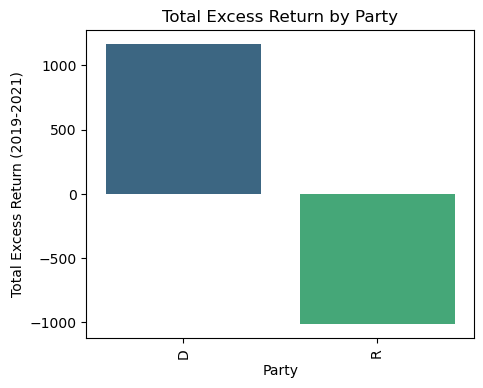

In [34]:
import seaborn as sns

# Convert grouped data to DataFrame for Seaborn
grouped_df = grouped_excess_return.reset_index()

# Plot
plt.figure(figsize=(5, 4))
sns.barplot(x='Party', y='excess_return', data=grouped_df, palette='viridis')
plt.xlabel('Party')
plt.ylabel('Total Excess Return (2019-2021)')
plt.title('Total Excess Return by Party')
plt.xticks(rotation=90) 
plt.show()

In [17]:
# Who had the most profitable trade? Which party was it? What was the company? When was it?

** Susie Lee, Democrat, HCA Healthcare, INC., sold on April 3, 2020 at a 214% gain (excess_return) **

# What was the Trade_Size_USD (volume) for each year of healthcare stocks, and did it progress from 2019-2021 more than other years?

** The Trade_Size_USD for this set of data shows inconclusive, which raises a new question as to why these trades show no USD amount ** 

SyntaxError: invalid syntax (3612235085.py, line 3)